# Newsreader Project

In [3]:
import pandas as pd
import string
import nltk
import re
import numpy as np
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from newspaper import Article, ArticleException
warnings.filterwarnings('ignore')

## Data Loading

In [4]:
Business = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Business.csv')
Entertainment = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Entertainment.csv')
Health = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Health.csv')
Science = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Science.csv')
Sports = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Sports.csv')
Technology = pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/Technology.csv')
World= pd.read_csv('/Users/rajwaghela/Downloads/Projects/newsreader/Datasets1/World.csv')

In [5]:
df = pd.concat([Business, Entertainment, Health, Science, Sports, Technology, World], ignore_index=True)
print(df.info())
print('dim:', df.shape)
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Authors        2792 non-null   object
 1   Pubslish_Date  1600 non-null   object
 2   Title          2792 non-null   object
 3   Text           2402 non-null   object
 4   Image          2745 non-null   object
 5   Link           2472 non-null   object
 6   Category       2792 non-null   object
dtypes: object(7)
memory usage: 152.8+ KB
None
dim: (2792, 7)


Authors  \
0  ['Howard Schneider Ann Saphir', 'Howard Schnei...   
1                                                 []   
2                      ['Buckrail', 'More Buckrail']   
3                                                 []   

               Pubslish_Date  \
0        2023-08-25 00:00:00   
1                        NaN   
2  2023-08-25 19:30:00+00:00   
3                        NaN   

                                               Title  \
0  Fed's Powell: higher rates may be needed, will...   
1              Yahooist Teil der Yahoo Markenfamilie   
2  Annual Economic Policy Symposium meets at Jack...   
3                                   Are you a robot?   

                                                Text  \
0  JACKSON HOLE, Wyoming, Aug 25 (Reuters) - The ...   
1                                                NaN   
2  GRAND TETON NATIONAL PARK — The Federal Reserv...   
3  Why did this happen?\n\nPlease make sure your ...   

                                               Image  \
0  https://www.reuters.com/resizer/BD79LKTBEhi2MP...   
1  https://s.yimg.com/oa/build/images/favicons/ya...   
2  https://i0.wp.com/buckrail.com/wp-content/uplo...   
3                                                NaN   

                                                Link  Category  
0  https://www.reuters.com/markets/us/fed-registe...  Business  
1                                                NaN  Business  
2  https://buckrail.com/annual-economic-policy-sy...  Business  
3                                                NaN  Business

## Data Preprocessing

               Category
Sports              482
Business            430
Entertainment       429
World               428
Technology          395
Health              330
Science             298 



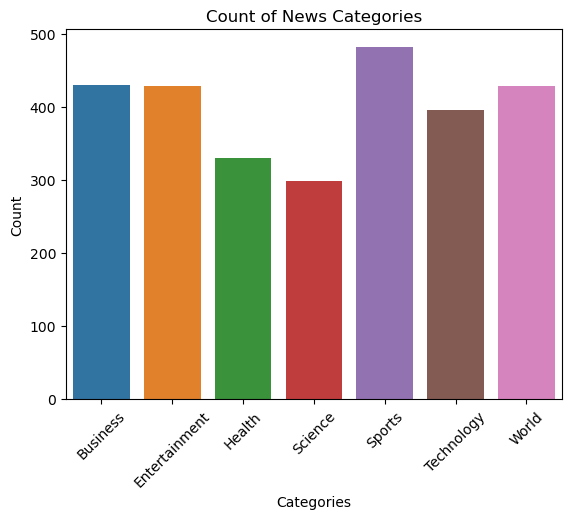

In [6]:
temp = pd.DataFrame(df.Category.value_counts())
print(temp, '\n')
sns.countplot(df, x='Category')
plt.xlabel("Categories")
plt.ylabel("Count")
# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.title("Count of News Categories")
plt.show()

In [7]:
# drop unnecessary columns
df = df.drop(columns=['Authors', 'Pubslish_Date', 'Image', 'Link'])
print(df.info())
print('dim:', df.shape)
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     2792 non-null   object
 1   Text      2402 non-null   object
 2   Category  2792 non-null   object
dtypes: object(3)
memory usage: 65.6+ KB
None
dim: (2792, 3)


Title  \
0  Fed's Powell: higher rates may be needed, will...   
1              Yahooist Teil der Yahoo Markenfamilie   
2  Annual Economic Policy Symposium meets at Jack...   
3                                   Are you a robot?   

                                                Text  Category  
0  JACKSON HOLE, Wyoming, Aug 25 (Reuters) - The ...  Business  
1                                                NaN  Business  
2  GRAND TETON NATIONAL PARK — The Federal Reserv...  Business  
3  Why did this happen?\n\nPlease make sure your ...  Business

In [8]:
# remove duplicate rows
duplicates_rows = df[df.duplicated(['Title', 'Text'], keep=False)]
df_len = len(df)
duplicates_rows_len = len(duplicates_rows)
proportion = round((duplicates_rows_len/df_len)*100, 2)
print('Proportion duplicate data was there =',proportion, '%')
df = df.drop_duplicates(
    subset=['Title', 'Text'], keep=False, ignore_index=True
)

Proportion duplicate data was there = 10.67 %


In [9]:
#remove null rows
null_rows = df[df.isna().any(axis=1)]
null_rows_len = len(null_rows)
proportion = round((null_rows_len/df_len)*100, 2)
print('Proportion of null data was there = ', proportion, '%')
df = df.dropna()
df = df.reset_index(drop=True)

Proportion of null data was there =  9.28 %


In [10]:
cookie_pages = df[df['Text'].str.contains('Cookie Banner', case=False)]
cookie_pages

Title  \
38    TSP contribution limits will increase again ne...   
1376  Mariners Moose Tracks, 8/22/23: Luis Castillo,...   
1567                  Steelers roster cuts tracker 2023   

                                                   Text  Category  
38    Cookie Preferences Cookie List\n\nCookie List\...  Business  
1376  Cookie banner\n\nWe use cookies and other trac...    Sports  
1567  Cookie banner\n\nWe use cookies and other trac...    Sports

In [11]:
df = df[~df['Text'].str.contains('Cookie Banner', case=False)]
df.reset_index(drop=True)
df = df.drop(columns=['Title'])

In [12]:
pattern = r'https?://\S+|ftp://\S+|www\.\S+'
for i in range(0, len(df)):
  r = re.findall(pattern, df['Text'].iloc[i])
  if r !=[]:
    print(r, i)

['www.bettermarkets.org.'] 123
['www.fdacs.gov.'] 186
['https://t.co/sxXfOETCuB'] 207
['https://t.co/lAnC1scJ9V'] 209
['https://t.co/SJRZ4FrfLE'] 214
['www.riteaid.com.'] 263
['https://t.co/6D3NJ1UpGJ'] 284
['https://t.co/LI7qxGghDr'] 297
['https://t.co/iQLD7h224s'] 298
['http://www.creatorspublishing.com'] 384
['https://t.co/WVsMV0nnZn'] 403
['https://t.co/DxuAwWkOxD'] 404
['http://www.creatorspublishing.com'] 528
['https://www.cinergy.com/amarillo', 'www.hphealthplan.com),'] 545
['https://t.co/mUn4tim61a', 'https://t.co/p1Cr3Sb7zg@saraya'] 602
['https://www.soapoperadigest.com/content/tbt-greg-vaughan5/"', 'https://soaps.sheknows.com/the-bold-and-the-beautiful/news/601253/bold-beautiful-jacqueline-macinnes-wood-tribute-anniversary-debut-steffy-forrester/"', 'https://www.soapoperadigest.com/content/tbt-kin-shriner/"', 'https://soaps.sheknows.com/the-young-and-the-restless/news/191/davetta-sherwood-lily-yr-is-let-go/">go', 'https://www.soapoperadigest.com/content/icymi-heather-tom-inte

In [13]:
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
for i in range(0, len(df)):
  r = re.findall(pattern, df['Text'].iloc[i])
  if r !=[]:
    print(r, i)

['matt.stadler@loancare.com'] 5
['jgrzelewski@detroitnews.com', 'bnoble@detroitnews.com'] 7
['SMorse@himss.org'] 70
['consumerprotection@cityofchicago.org'] 87
['rchannick@chicagotribune.com'] 88
['jlareau@freepress.com'] 113
['vses.petrecords@thrivepet.com', 'mgreenwo@rocheste.gannett.com'] 133
['nalund@usatoday.com'] 148
['tristan@tristanmanalac.com', 'tristan.manalac@biospace.com'] 165
['lynchjourno@gmail.com'] 171
['licensing@dailycallernewsfoundation.org'] 188
['licensing@dailycallernewsfoundation.org'] 209
['wcowperthwaite@providencejournal.com'] 211
['rmace@gannett.com'] 213
['smatat@pbpost.com'] 244
['jlareau@freepress.com'] 265
['khall@detroitnews.com'] 266
['kgosselin@courant.com'] 287
['hello@drsamberne.com'] 308
['letters@time.com'] 319
['TVsTop5@THR.com'] 361
['cjordan@app.com'] 410
['sj.munro@verizon.net'] 412
['ed.masley@arizonarepublic.com'] 418
['dina.kaur@arizonarepublic.com'] 420
['newstips@ign.com'] 513
['info@hphealthplan.com'] 545
['newstipsatlanta@fox.com'] 578
[

In [14]:
pattern = r'\b(?:\+?\d{1,3}[-.])?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b'
for i in range(0, len(df)):
  r = re.findall(pattern, df['Text'].iloc[i])
  if r !=[]:
    print(r, i)

['646-361-6808', '1-800-375-6071', '619.302.0010'] 5
['1110865786'] 50
['315) 446-7933', '716) 662-6660', '716) 213-0283'] 133
['585) 424-1277'] 135
['866) 847-1086'] 222
['0.0000008969'] 298
['877) 239-3777', '800-332-1088'] 308
['602-444-4495'] 418
['561-808-1100'] 428
['806-862-4601', '806-323-9114', '806-659-4130', '806-435-4501', '806-868-3191'] 545
['423-757-6673'] 683
['1-800-942-2555'] 731
['308-487-3600', '866-701-7173'] 769
['308-487-3600', '866-701-7173'] 770
['2304735120'] 977
['2301366120'] 1140
['1-800-589-9966', '1-800-522-4700'] 1244
['1-800-589-9966', '1-800-522-4700'] 1322
['716-528-6727'] 1438
['816-581-7500'] 1797
['503-294-4072'] 2207


In [15]:
# tokenization
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
'''nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')'''

def process_text(text):

    text = re.sub(r'https?://\S+|ftp://\S+|www\.\S+', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', '', text)
    text = re.sub(r'\b(?:\+?\d{1,3}[-.])?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = ''.join(char for char in text if char in string.ascii_letters or char.isspace())
    # Remove more than one consecutive white spaces
    
    cleaned_text = text.lower()
    
    tokens = word_tokenize(cleaned_text, 'english')
    tokens = [word for word in tokens if word not in string.punctuation]

    stemmer = PorterStemmer()
    stem_tokens = [stemmer.stem(word) for word in tokens]
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in stem_tokens if word.lower() not in stop_words]
    Filtered_text = ' '.join(filtered_tokens)
    
    return Filtered_text

df['Text'] = df['Text'].apply(process_text)
df.head(4)

Text  Category
0  jackson hole wyom aug reuter feder reserv may ...  Business
1  grand teton nation park feder reserv bank kans...  Business
2  instacart groceri deliveri compani slash valua...  Business
3  onli one word english languag come close captu...  Business

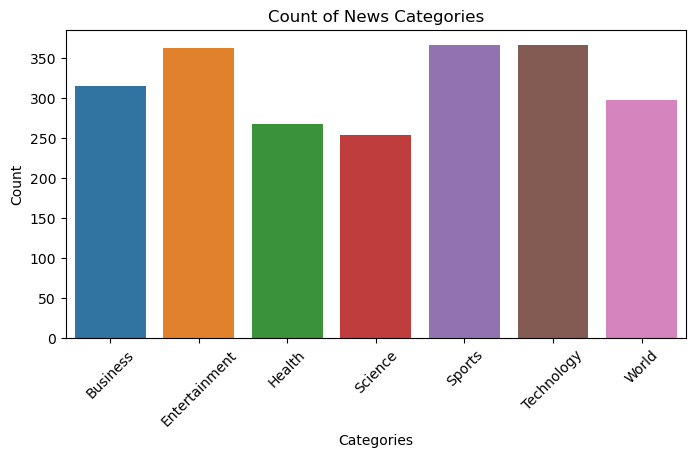

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Category')
plt.xlabel("Categories")
plt.ylabel("Count")
# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.title("Count of News Categories")
plt.show()

## Text Featurization

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer 

# label encodeing
data = df.iloc[:, 0:1]
category = df['Category']

encoder = LabelEncoder()
labels = encoder.fit_transform(category)
dict_label_value = {labels[i]: category.iloc[i] for i in range(len(labels))}
print('labels ==>: \n',dict_label_value)

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.4, random_state=53)

tf_idf = TfidfVectorizer(analyzer='word',ngram_range=(1,3), max_features=5000)
X_train_idf = tf_idf.fit_transform(X_train['Text']).toarray()
X_test_idf = tf_idf.transform(X_test['Text']).toarray()

labels ==>: 
 {0: 'Business', 1: 'Entertainment', 2: 'Health', 3: 'Science', 4: 'Sports', 5: 'Technology', 6: 'World'}


## Model fitting

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
import warnings

class ModelEvaluator:
    def __init__(self,model, x_train, x_test, y_train, y_test, dict_label_value):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = model
        self.dict_label_value = dict_label_value
        
    def train(self):
        self.model.fit(self.x_train, self.y_train)
    
    def evaluation1(self):
        self.y_pred = self.model.predict(self.x_test)
        accuracy = round(accuracy_score(self.y_test, self.y_pred)*100, 2)
        classification_rep = classification_report(self.y_test, self.y_pred)
        return self.y_pred, accuracy, classification_rep
    
    def plot_confusion_matrix(self):
        plt.figure(figsize=(5, 5))
        cm = confusion_matrix(self.y_test, self.y_pred, normalize='true', labels=np.unique(self.y_test))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.dict_label_value.values())
        disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
        plt.title("Normalized Confusion Matrix")
        plt.show()
        
    
    def plot_precision_recall_curves(self):
        y_test_bin = label_binarize(self.y_test, classes=range(7))
        n_classes = y_test_bin.shape[1]

        y_pred_prob = self.model.predict_proba(self.x_test)

        precision_data = []
        recall_data = []
        threshold_data = []

        for i in range(n_classes):
            precision_i, recall_i, threshold_i = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
            precision_data.append(precision_i)
            recall_data.append(recall_i)
            threshold_data.append(threshold_i)

        pr_data = pd.DataFrame({
            'Class': [self.dict_label_value[i] for i in range(n_classes)],
            'Precision': precision_data,
            'Recall': recall_data,
            'Threshold': threshold_data
        })

        figs = sp.make_subplots(rows=4, cols=2, subplot_titles=[f'{pr_data.Class.iloc[i]}' for i in range(n_classes)])

        for i in range(n_classes):
            row = i // 2 + 1
            col = i % 2 + 1

            pr_trace = go.Scatter(
                x=pr_data['Recall'].iloc[i],
                y=pr_data['Precision'].iloc[i],
                mode='lines',
                fill='tozeroy',
                name=f'Class {i}',
                hovertemplate='Recall: %{x:.2f}<br>Precision: %{y:.2f}<br>Threshold: %{text:.2f}',
                text=pr_data['Threshold'][i]
            )

            fig = go.Figure(data=[pr_trace])

            fig.update_layout(
                xaxis_title='Recall',
                yaxis_title='Precision',
                xaxis=dict(range=[0, 1]),
                yaxis=dict(range=[0, 1]),
                hovermode='closest',
                showlegend=False,
                width=500,
                height=400,
                title=f'{pr_data.Class.iloc[i]} Precision-Recall Curve'
            )

            fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=1, y1=0)

            figs.add_trace(pr_trace, row=row, col=col)
            figs.update_xaxes(title_text='Recall', row=row, col=col)
            figs.update_yaxes(title_text='Precision', row=row, col=col)

        figs.update_layout(title='Precision-Recall Curves for Each Class', height=1200, width=1000)
        figs.show()

    def optimization_and_evaluation(self, parameters):
        self.evaluated_model = GridSearchCV(self.model, param_grid=parameters, cv=3)
        self.evaluated_model.fit(self.x_train, self.y_train)
        
        y_pred_e = self.evaluated_model.predict(self.x_test)
        classification_rep = classification_report(self.y_test, y_pred_e)
        accuracy = round(accuracy_score(self.y_test, y_pred_e)*100, 2)
        return  y_pred_e, accuracy, classification_rep, self.evaluated_model.best_params_

   
    def model_predict(self, vec):
        preds = self.evaluated_model.predict(vec)
        labels = {}
        for i, p in enumerate(preds):
            labels[p] = self.dict_label_value[p]
        return labels, preds

##  Logistic regression

In [61]:
model_lr = ModelEvaluator(LogisticRegression(), x_train = X_train_idf, x_test = X_test_idf, y_train = Y_train, y_test = Y_test, dict_label_value = dict_label_value)
model_lr.train()
predictions, accuracy, classif_rp = model_lr.evaluation1()
print('accuracy score with first training sample == >', accuracy)
print('classification report with first training sample ==> \n', classif_rp)

accuracy score with first training sample == > 92.27
classification report with first training sample ==> 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       135
           1       0.91      0.95      0.93       149
           2       0.88      0.92      0.90        91
           3       0.92      0.96      0.94        99
           4       0.97      0.95      0.96       155
           5       0.92      0.97      0.94       141
           6       0.96      0.81      0.88       123

    accuracy                           0.92       893
   macro avg       0.92      0.92      0.92       893
weighted avg       0.92      0.92      0.92       893



<Figure size 500x500 with 0 Axes>

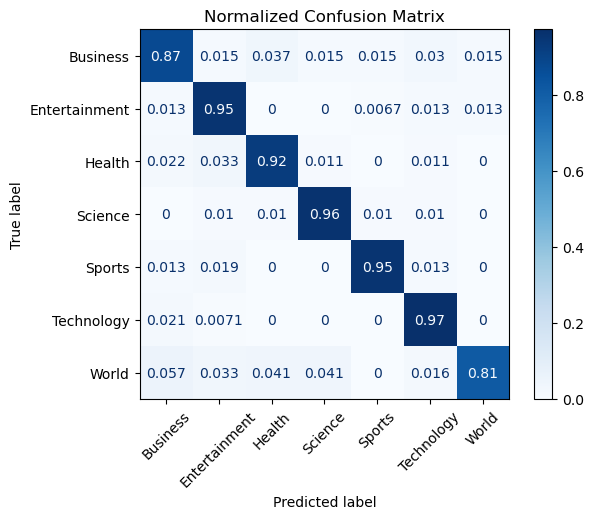

In [62]:
model_lr.plot_confusion_matrix()

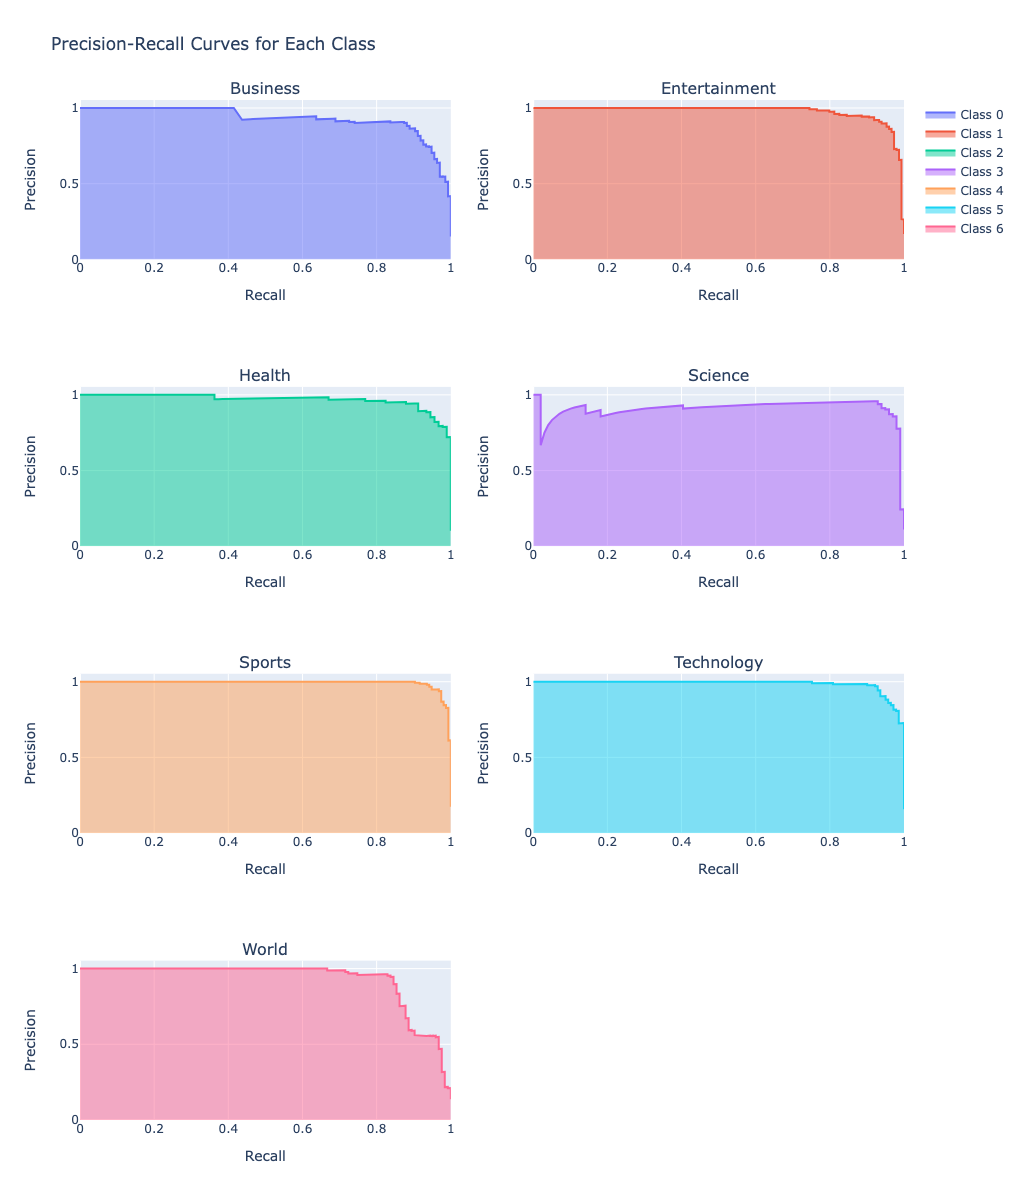

In [63]:
model_lr.plot_precision_recall_curves()

In [64]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': [None, 'balanced']
}
test_results, lr_accuracy, classifi_rep, best_params  = model_lr.optimization_and_evaluation(parameters=parameters)

print(f'Best params ====>: ',best_params)
print('Accuracy score after tuning and evaluating ==>:', accuracy)
print('Classification Report ==>  \n', classif_rp)

KeyboardInterrupt: 

In [ ]:
model_lr.plot_confusion_matrix()

In [ ]:
urls = [
    'https://www.universetoday.com/162955/the-whirlpool-galaxy-seen-by-jwst/',
    'https://www.cnbc.com/2023/08/29/first-bitcoin-etf-could-be-coming-soon-as-court-rules-in-favor-of-grayscale-over-sec.html'
]
true = np.array([3,0])
data = pd.DataFrame(columns=['text'])
for url in urls:
    # Download and parse the article
    Text = Article(url)
    Text.download()
    Text.parse()
    content = Text.text
    data = data.append({'text': content}, ignore_index=True)
data['text'] = data['text'].apply(process_text)
data

In [ ]:
vec = tf_idf.transform(data['text']).toarray()
labels, results = model_lr.model_predict(vec)
print(labels)
print('prediction accuracy = ',round(accuracy_score(true, results)*100, 2), '%')

## Random Forest

In [17]:
model_rf = ModelEvaluator(RandomForestClassifier(), x_train = X_train_idf, x_test = X_test_idf, y_train = Y_train, y_test = Y_test, dict_label_value = dict_label_value)
model_rf.train()
predictions, accuracy, classif_rp = model_rf.evaluation1()
print('accuracy score with first training sample == >', accuracy)
print('classification report with first training sample ==> \n', classif_rp)

accuracy score with first training sample == > 0.8689809630459127
classification report with first training sample ==> 
               precision    recall  f1-score   support

           0       0.88      0.78      0.82       135
           1       0.88      0.87      0.88       149
           2       0.82      0.84      0.83        91
           3       0.91      0.87      0.89        99
           4       0.90      0.97      0.93       155
           5       0.82      0.92      0.87       141
           6       0.88      0.80      0.83       123

    accuracy                           0.87       893
   macro avg       0.87      0.86      0.86       893
weighted avg       0.87      0.87      0.87       893



<Figure size 500x500 with 0 Axes>

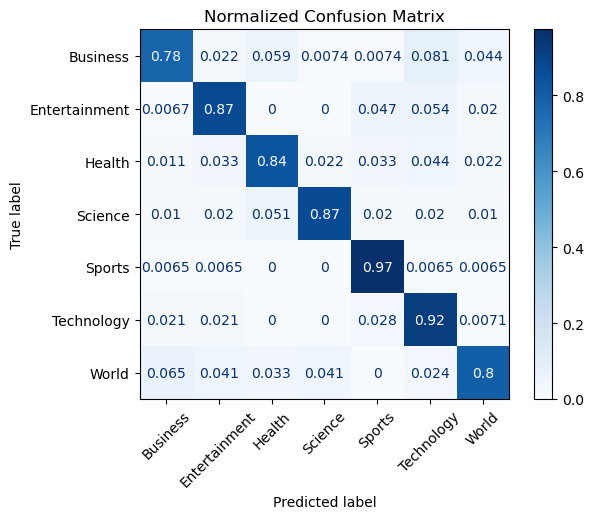

In [18]:
model_rf.plot_confusion_matrix()

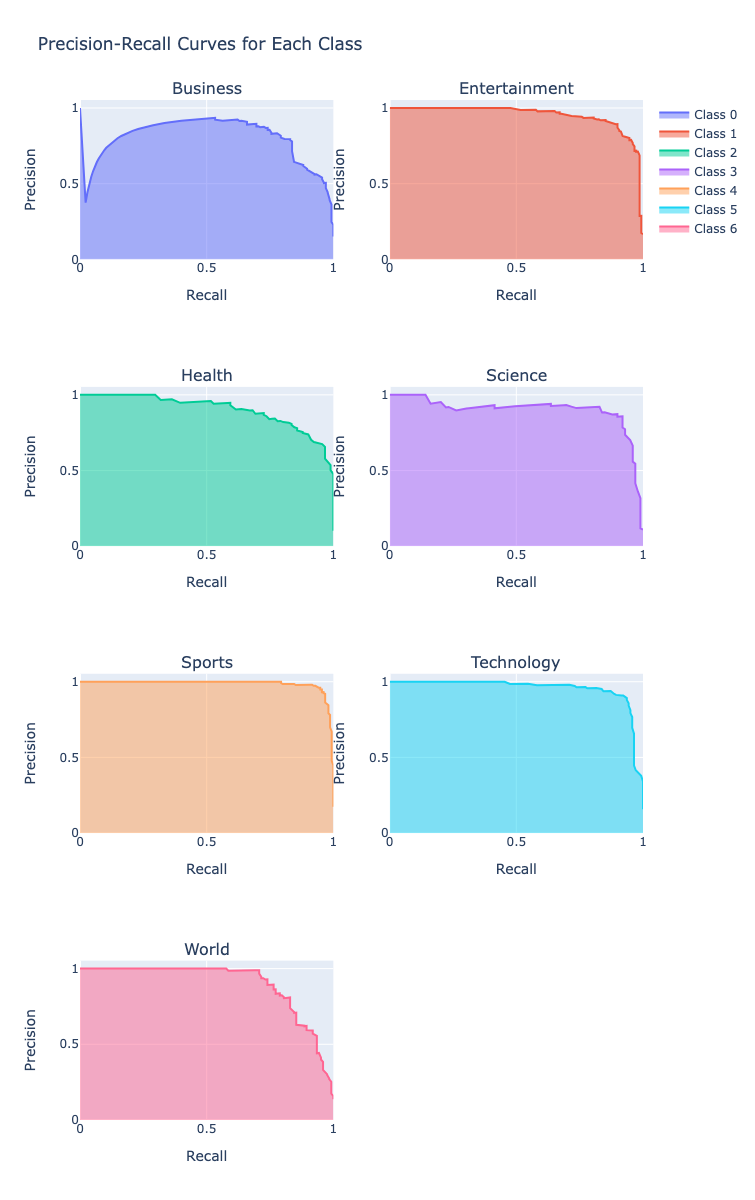

In [19]:
model_rf.plot_precision_recall_curves()

In [20]:
parameters = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto'],
    'max_depth': [None, 10, 20],
    'bootstrap': [True],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
test_results, rf_accuracy, classifi_rep, best_params  = model_rf.optimization_and_evaluation(parameters=parameters)

print(f'Best params ====>: ',best_params)
print('Accuracy score after tuning and evaluating ==>:', accuracy)
print('Classification Report ==>  \n', classif_rp)

Best params ====>:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy score after tuning and evaluating ==>: 0.8689809630459127
Classification Report ==>  
               precision    recall  f1-score   support

           0       0.88      0.78      0.82       135
           1       0.88      0.87      0.88       149
           2       0.82      0.84      0.83        91
           3       0.91      0.87      0.89        99
           4       0.90      0.97      0.93       155
           5       0.82      0.92      0.87       141
           6       0.88      0.80      0.83       123

    accuracy                           0.87       893
   macro avg       0.87      0.86      0.86       893
weighted avg       0.87      0.87      0.87       893



<Figure size 500x500 with 0 Axes>

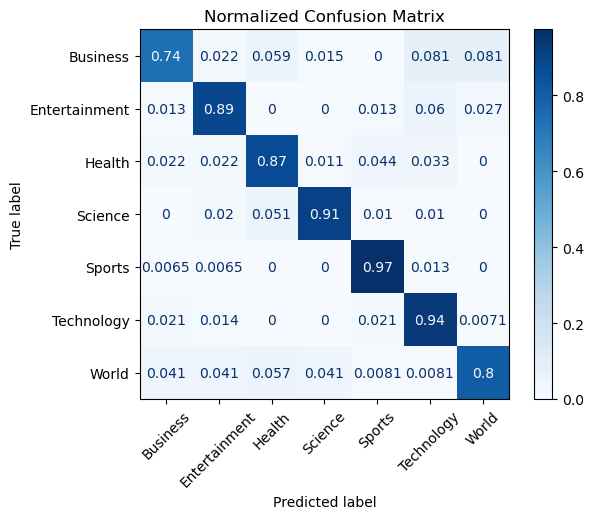

In [21]:
model_rf.plot_confusion_matrix()

In [22]:
urls = [
    'https://www.universetoday.com/162955/the-whirlpool-galaxy-seen-by-jwst/',
    'https://www.cnbc.com/2023/08/29/first-bitcoin-etf-could-be-coming-soon-as-court-rules-in-favor-of-grayscale-over-sec.html'
]
true = np.array([3,0])
data = pd.DataFrame(columns=['text'])
for url in urls:
    # Download and parse the article
    Text = Article(url)
    Text.download()
    Text.parse()
    content = Text.text
    data = data.append({'text': content}, ignore_index=True)
data['text'] = data['text'].apply(process_text)
data

text
0  whirlpool galaxi aka one wellknown object nigh...
1  us court appeal dc circuit ha pave way bitcoin...

In [24]:
vec = tf_idf.transform(data['text']).toarray()
labels, results = model_rf.model_predict(vec)
print(labels)
print('prediction accuracy = ',round(accuracy_score(true, results)*100, 2), '%')

{3: 'Science', 0: 'Business'}
prediction accuracy =  100.0 %


## MultinomialNB

In [53]:
model_nb = ModelEvaluator(MultinomialNB(), x_train = X_train_idf, x_test = X_test_idf, y_train = Y_train, y_test = Y_test, dict_label_value = dict_label_value)
model_nb.train()
predictions, accuracy, classif_rp = model_nb.evaluation1()
print('accuracy score with first training sample == >', accuracy)
print('classification report with first training sample ==> \n', classif_rp)

accuracy score with first training sample == > 90.59
classification report with first training sample ==> 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       135
           1       0.90      0.95      0.92       149
           2       0.82      0.95      0.88        91
           3       0.92      0.92      0.92        99
           4       0.95      0.95      0.95       155
           5       0.89      0.95      0.92       141
           6       0.95      0.79      0.86       123

    accuracy                           0.91       893
   macro avg       0.90      0.90      0.90       893
weighted avg       0.91      0.91      0.91       893



<Figure size 500x500 with 0 Axes>

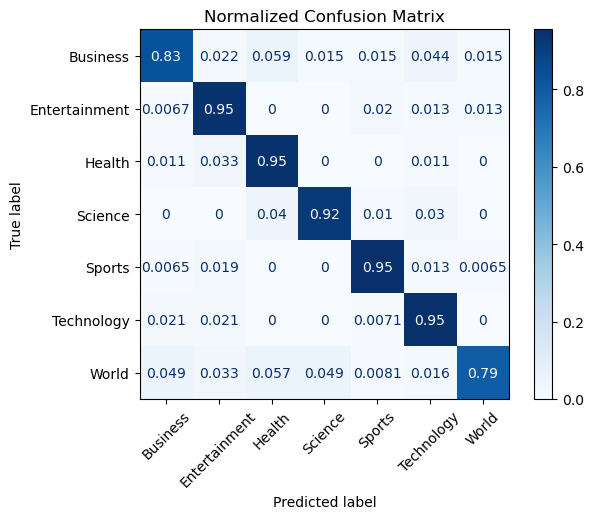

In [54]:
model_nb.plot_confusion_matrix()

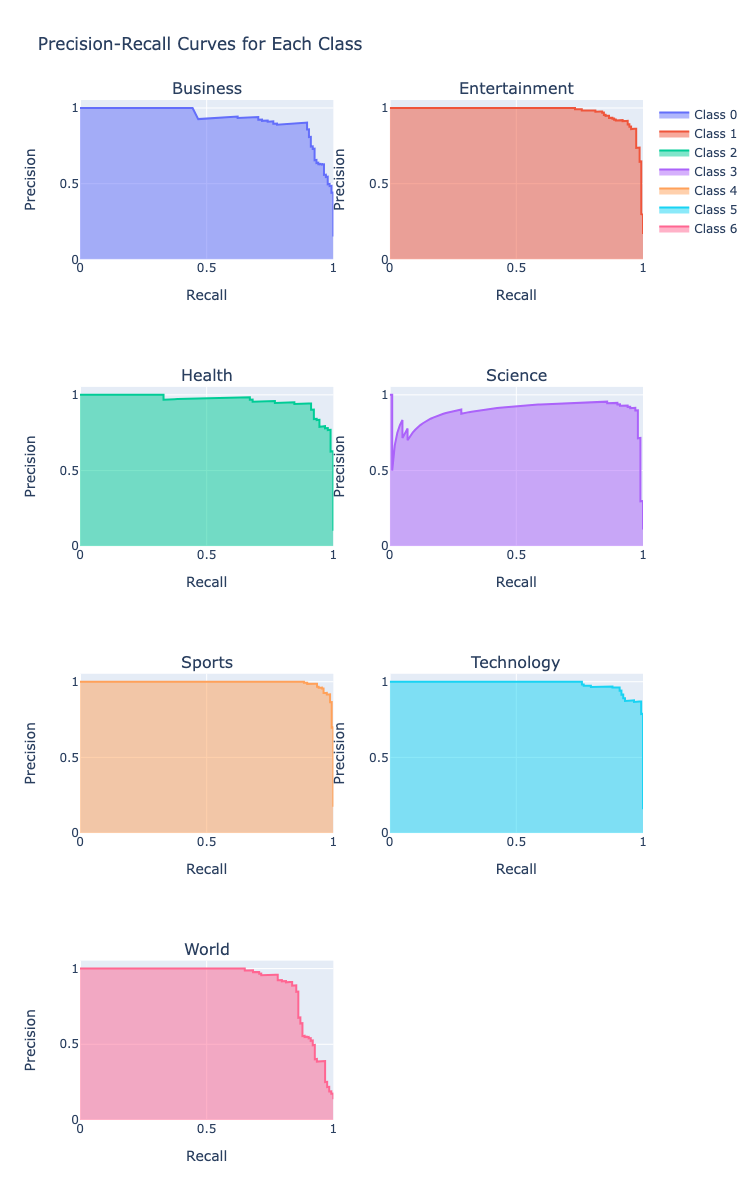

In [55]:
model_nb.plot_precision_recall_curves()

In [56]:
parameters = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  # Additive smoothing parameter
    'fit_prior': [True, False]           # Whether to learn class prior probabilities
}
test_results, nb_accuracy, classifi_rep, best_params  = model_nb.optimization_and_evaluation(parameters=parameters)

print(f'Best params ====>: ',best_params)
print('Accuracy score after tuning and evaluating ==>:', accuracy)
print('Classification Report ==>  \n', classif_rp)

Best params ====>:  {'alpha': 0.1, 'fit_prior': True}
Accuracy score after tuning and evaluating ==>: 90.59
Classification Report ==>  
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       135
           1       0.90      0.95      0.92       149
           2       0.82      0.95      0.88        91
           3       0.92      0.92      0.92        99
           4       0.95      0.95      0.95       155
           5       0.89      0.95      0.92       141
           6       0.95      0.79      0.86       123

    accuracy                           0.91       893
   macro avg       0.90      0.90      0.90       893
weighted avg       0.91      0.91      0.91       893



<Figure size 500x500 with 0 Axes>

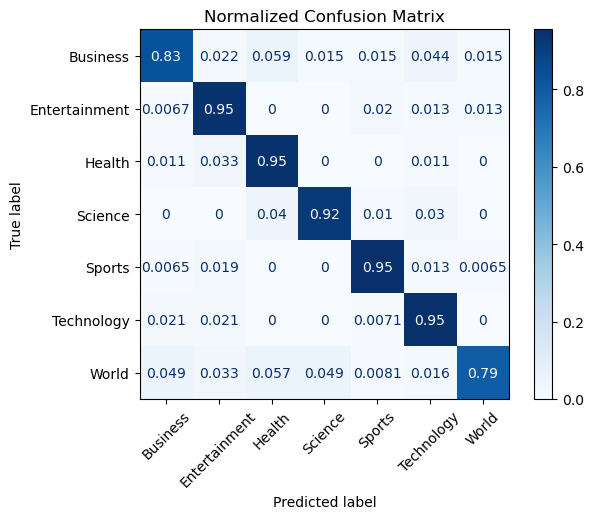

In [57]:
model_nb.plot_confusion_matrix()

In [58]:
urls = [
    'https://www.universetoday.com/162955/the-whirlpool-galaxy-seen-by-jwst/',
    'https://www.cnbc.com/2023/08/29/first-bitcoin-etf-could-be-coming-soon-as-court-rules-in-favor-of-grayscale-over-sec.html'
]
true = np.array([3,0])
data = pd.DataFrame(columns=['text'])
for url in urls:
    # Download and parse the article
    Text = Article(url)
    Text.download()
    Text.parse()
    content = Text.text
    data = data.append({'text': content}, ignore_index=True)
data['text'] = data['text'].apply(process_text)
data

text
0  whirlpool galaxi aka one wellknown object nigh...
1  us court appeal dc circuit ha pave way bitcoin...

In [59]:
vec = tf_idf.transform(data['text']).toarray()
labels, results = model_nb.model_predict(vec)
print(labels)
print('prediction accuracy = ',round(accuracy_score(true, results)*100, 2), '%')

{3: 'Science', 0: 'Business'}
prediction accuracy =  100.0 %


## SVM

In [41]:
model_svm = ModelEvaluator(SVC(probability=True), x_train = X_train_idf, x_test = X_test_idf, y_train = Y_train, y_test = Y_test, dict_label_value = dict_label_value)
model_svm.train()
predictions, accuracy, classif_rp = model_svm.evaluation1()
print('accuracy score with first training sample == >', accuracy)
print('classification report with first training sample ==> \n', classif_rp)

accuracy score with first training sample == > 0.9249720044792833
classification report with first training sample ==> 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       135
           1       0.89      0.96      0.93       149
           2       0.91      0.95      0.93        91
           3       0.93      0.94      0.93        99
           4       0.99      0.93      0.96       155
           5       0.93      0.97      0.95       141
           6       0.94      0.83      0.88       123

    accuracy                           0.92       893
   macro avg       0.93      0.92      0.92       893
weighted avg       0.93      0.92      0.92       893



<Figure size 500x500 with 0 Axes>

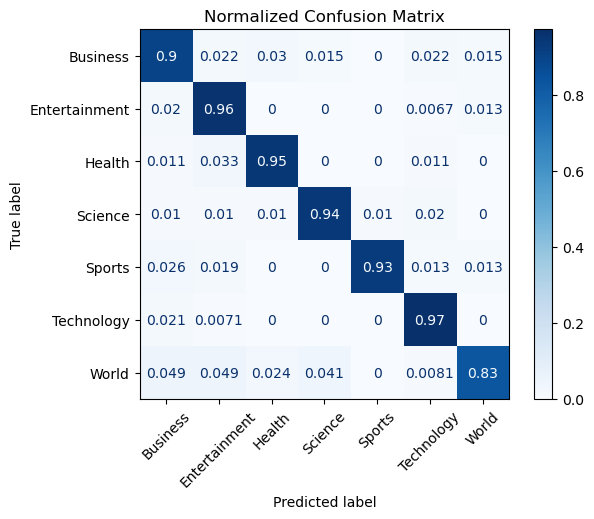

In [42]:
model_svm.plot_confusion_matrix()

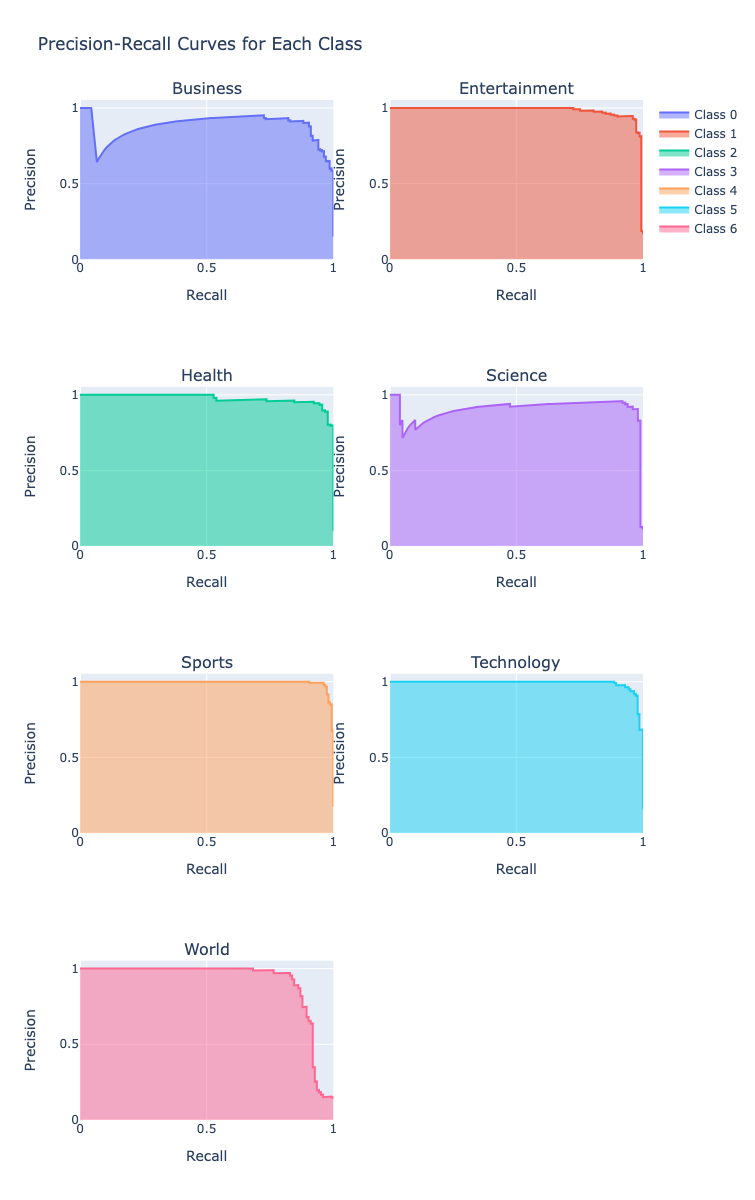

In [43]:
model_svm.plot_precision_recall_curves()

In [44]:
parameters = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'sigmoid'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' and 'poly'
}
test_results, svm_accuracy, classifi_rep, best_params  = model_svm.optimization_and_evaluation(parameters=parameters)

print(f'Best params ====>: ',best_params)
print('Accuracy score after tuning and evaluating ==>:', accuracy)
print('Classification Report ==>  \n', classif_rp)

Best params ====>:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy score after tuning and evaluating ==>: 0.9249720044792833
Classification Report ==>  
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       135
           1       0.89      0.96      0.93       149
           2       0.91      0.95      0.93        91
           3       0.93      0.94      0.93        99
           4       0.99      0.93      0.96       155
           5       0.93      0.97      0.95       141
           6       0.94      0.83      0.88       123

    accuracy                           0.92       893
   macro avg       0.93      0.92      0.92       893
weighted avg       0.93      0.92      0.92       893



<Figure size 500x500 with 0 Axes>

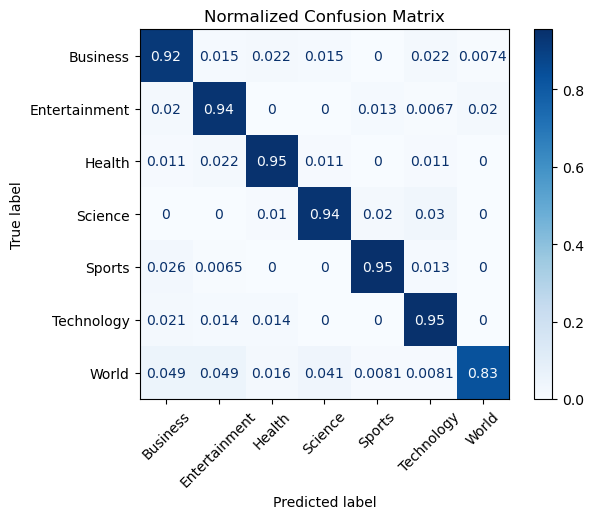

In [45]:
model_svm.plot_confusion_matrix()

In [46]:
urls = [
    'https://www.universetoday.com/162955/the-whirlpool-galaxy-seen-by-jwst/',
    'https://www.cnbc.com/2023/08/29/first-bitcoin-etf-could-be-coming-soon-as-court-rules-in-favor-of-grayscale-over-sec.html'
]
true = np.array([3,0])
data = pd.DataFrame(columns=['text'])
for url in urls:
    # Download and parse the article
    Text = Article(url)
    Text.download()
    Text.parse()
    content = Text.text
    data = data.append({'text': content}, ignore_index=True)
data['text'] = data['text'].apply(process_text)
data

text
0  whirlpool galaxi aka one wellknown object nigh...
1  us court appeal dc circuit ha pave way bitcoin...

In [47]:
vec = tf_idf.transform(data['text']).toarray()
labels, results = model_svm.model_predict(vec)
print(labels)
print('prediction accuracy = ',round(accuracy_score(true, results)*100, 2), '%')

{3: 'Science', 0: 'Business'}
prediction accuracy =  100.0 %


## Accuracy Score Plot

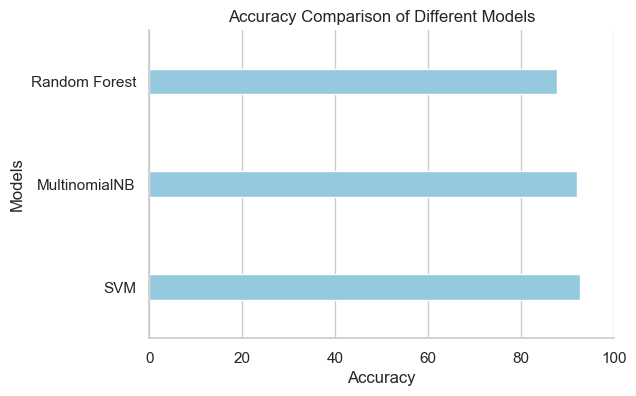

In [54]:
names = ['Logistic Regression', 'MultinomialNB']
acc = [lr_accuracy, nb_accuracy]

sns.set(style="whitegrid")  # Set the style

plt.figure(figsize=(6, 4))
sns.barplot(x=acc, y=names, color='skyblue', orient='h', ci=None, width = 0.25)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Accuracy Comparison of Different Models")
plt.xlim(0, 100)  # Set x-axis limits
for i, v in enumerate(acc):
    barplot.text(v + 1, i, f'{v:.2f}', va='center')
sns.despine()  # Remove spines
plt.show()
